# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [76]:
# your answer here
import random
import numpy as np
import pandas as pd
import re
import time
import matplotlib.pyplot as plt
import math
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv('data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
employee.groupby('Department').agg('mean')

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [4]:
# Method 2
# your answer here
employee_pivot=employee.pivot_table(index='Department', values='Salary')
employee_pivot

#he aggregated the results for those with the mean, which is his default aggregation

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
# your answer here
employee_pivot2=employee.pivot_table(index=['Department', 'Title'], values='Salary')
employee_pivot2


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
employee_pivot3=employee.pivot_table(index='Title')
employee_pivot3
#mean of salary and years by default by title

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# your answer here
employee_pivot4=employee.pivot_table(index=['Department', 'Title'], aggfunc={'Name':'count', 'Salary':'mean'})
employee_pivot4

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your answer here
employee['min'] = employee['Salary']
employee['max'] = employee['Salary']
employee['Std'] = employee['Salary']
employee=employee.rename(columns={'Salary':'Mean'})
employee_pivot5=employee.pivot_table(index=['Department', 'Title'], aggfunc={'Mean':'mean', 'min':'min', 'max':'max', 'Std':'std'})
display(employee_pivot5)
employee=employee.rename(columns={'Mean':'Salary'})
employee=employee.drop(columns=['min'])
employee=employee.drop(columns=['max'])
employee=employee.drop(columns=['Std'])

#THe NaN we got in the Std Column are NaN because the series were a signle element ex: There is only 1 HR VP
#For those single position min=max=mean&std=0

Mean       Std  max  min
Department Title                              
HR         VP         70.0       NaN   70   70
           analyst    32.5  3.535534   35   30
IT         VP         70.0       NaN   70   70
           analyst    32.5  3.535534   35   30
           associate  60.0       NaN   60   60
Sales      associate  55.0  0.000000   55   55

#### Based on your comments, fill the missing values with an appropriate value.

In [31]:
# your answer here
employee_pivot5.fillna(0)

Mean       Std  max  min
Department Title                              
HR         VP         70.0  0.000000   70   70
           analyst    32.5  3.535534   35   30
IT         VP         70.0  0.000000   70   70
           analyst    32.5  3.535534   35   30
           associate  60.0  0.000000   60   60
Sales      associate  55.0  0.000000   55   55

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [33]:
# your answer here
employee_pivot6=employee.pivot_table(index=['Department'], aggfunc={'Name':'count', 'Salary':'sum'})
employee_pivot6

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [35]:
# your answer here
employee_pivot7=employee.pivot_table(index=['Department', 'Title'], aggfunc={'Years':'sum', 'Salary':'mean'})
employee_pivot7

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [12]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [36]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [39]:
# your answer here
fitbit.info()
print(type(fitbit['Date'][0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [40]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [15]:
# your answer here


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [50]:
# your answer here
#corr = np.corrcoef(fitbit['Minutes Very Active'], fitbit['Steps'])
#print(corr)

corr2=fitbit['Minutes Very Active'].corr(fitbit['Steps'])
corr2

0.5714518481062607

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

LinregressResult(slope=0.003166996350674802, intercept=3.667036825251536, rvalue=0.5714518481062606, pvalue=3.3572824994531706e-33, stderr=0.00023805200376225368)


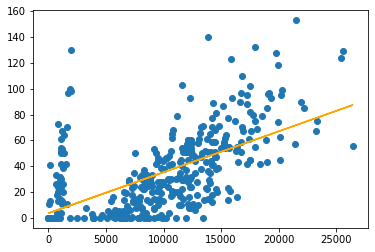

In [55]:
# your answer here
y = fitbit['Minutes Very Active']
x = fitbit['Steps']

results = stats.linregress(x,y)
print(results)

regression_line = results.intercept + results.slope*x

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [18]:
# your answer here
#regression line
#y=mx+b
#m=0.00316 (slope)
#b= 3.66703 (intercept)

#correlation between these 2 series is =0.5715 which means it is positevely correlated 


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [56]:
# your answer here
corr3=fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
corr3

0.0769060806299009

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

LinregressResult(slope=0.0040521982158223425, intercept=522.9197992014915, rvalue=0.0769060806299009, pvalue=0.14143690593734606, stderr=0.002749764048326206)


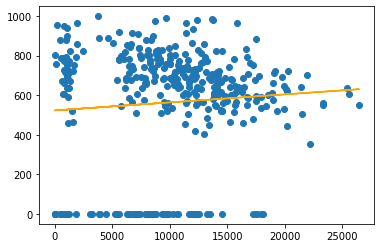

In [57]:
# your answer here
y = fitbit['Minutes Sedentary']
x = fitbit['Steps']

results = stats.linregress(x,y)
print(results)

regression_line = results.intercept + results.slope*x

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

#Correlation between these 2 values is mostly 0.07 which is super low therefore it means uncorrelated! or no correlation


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [58]:
# your answer here
corr4=fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
corr4

0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

LinregressResult(slope=0.0036230436318129854, intercept=253.80860707156393, rvalue=0.13098565950836386, pvalue=0.012018728392518023, stderr=0.0014353089787510329)


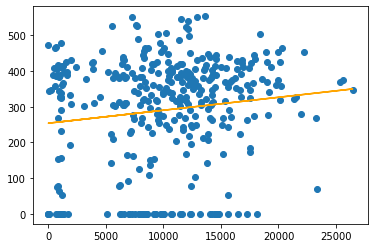

In [59]:
# your answer here
y = fitbit['MinutesOfSleep']
x = fitbit['Steps']

results = stats.linregress(x,y)
print(results)

regression_line = results.intercept + results.slope*x

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

#Correlation between these 2 values is mostly 0.13 which is low therefore it means uncorrelated! or very slightly positive correlation!

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [64]:
# your answer here
fitbit2 = fitbit.loc[:, ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]

#corr = np.corrcoef(fitbit['Minutes Very Active'], fitbit['Steps'])
#print(corr)

cor_fit = fitbit2.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [71]:
# your answer here
steps_col= cor_fit.loc[:, ['Steps']]
steps_col_sort=steps_col.sort_values(by='Steps', ascending=False )
steps_col_sort = steps_col_sort.iloc[1:]
steps_col_sort=steps_col_sort.rename(columns={"Steps": "Steps Correlation"})
steps_col_sort

,Steps Correlation
Minutes Very Active,0.571452
Floors,0.306511
Calorie burned,0.255305
MinutesOfSleep,0.130986
Minutes Sedentary,0.076906


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [72]:
# your answer here
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

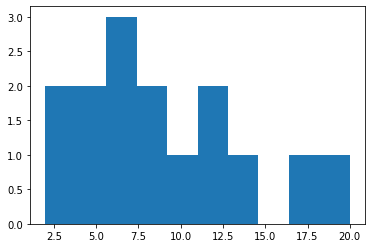

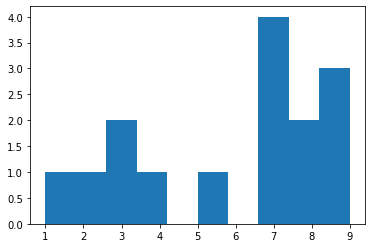

In [74]:
# your answer here
plt.hist(time_grades['Study time'])
plt.show()
plt.hist(time_grades['Grade'])
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [80]:
# your answer here
x=time_grades['Study time']
y=time_grades['Grade']
print(stats.pearsonr(x, y))# Pearson's)
print(stats.spearmanr(x, y))# Spearman's)

#Study and Grade are higly correlated, if a student studies more he will have better grades (They say so -.- )
#We obtain 2 different correlation when using pearson or spearman because they have different methods of calculating it. Spearman takes RANK into consideration

(0.7980456073578857, 0.0003627635256342742)
SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

LinregressResult(slope=0.4175531914893617, intercept=2.1753546099290784, rvalue=0.7980456073578858, pvalue=0.00036276352563427265, stderr=0.08744589427195074)


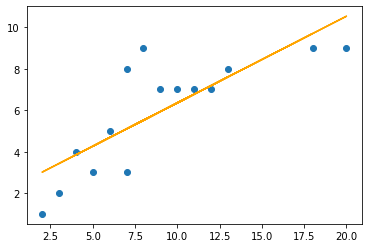

In [81]:
# your answer here
x = time_grades['Study time']
y = time_grades['Grade']

results = stats.linregress(x,y)
print(results)

regression_line = results.intercept + results.slope*x

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [29]:
# your answer here

#THE SPEARMAN CORRELATION DOESN'T LOOK FOR A LINEAR RELATIONSHIP BUT RATHER A MONOTONIC
#RELATIONSHIP (IN THE SAME DIRECTION). IT DOES SO BY COMPARING THE RANK OF THE POINTS

#THE CORRELATION PROVIDES THE DIRECTION AND STRENGTH OF THE LINEAR RELATIONSHIP BETWEEN
#TWO VARIABLES
